# Supervised Learning Capstone Project - Tree Methods Focus 


## GOAL: Create a model to predict whether or not a customer will Churn .



In [1]:
import pyforest

In [2]:
df = pd.read_csv('/home/mete/udemy/DATA/Telco-Customer-Churn.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

## General Feature Exploration

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<IPython.core.display.Javascript object>

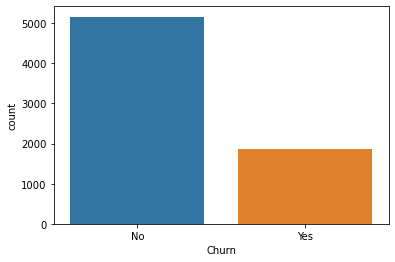

In [11]:
sns.countplot(x="Churn", data=df);

####  inbalanced dataset!!!

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<IPython.core.display.Javascript object>

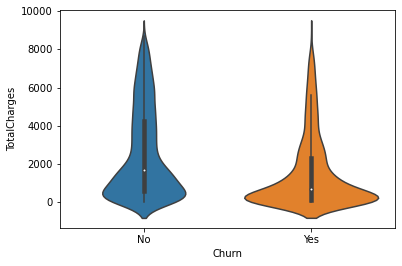

In [18]:
sns.violinplot(y="TotalCharges", x="Churn", data=df);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

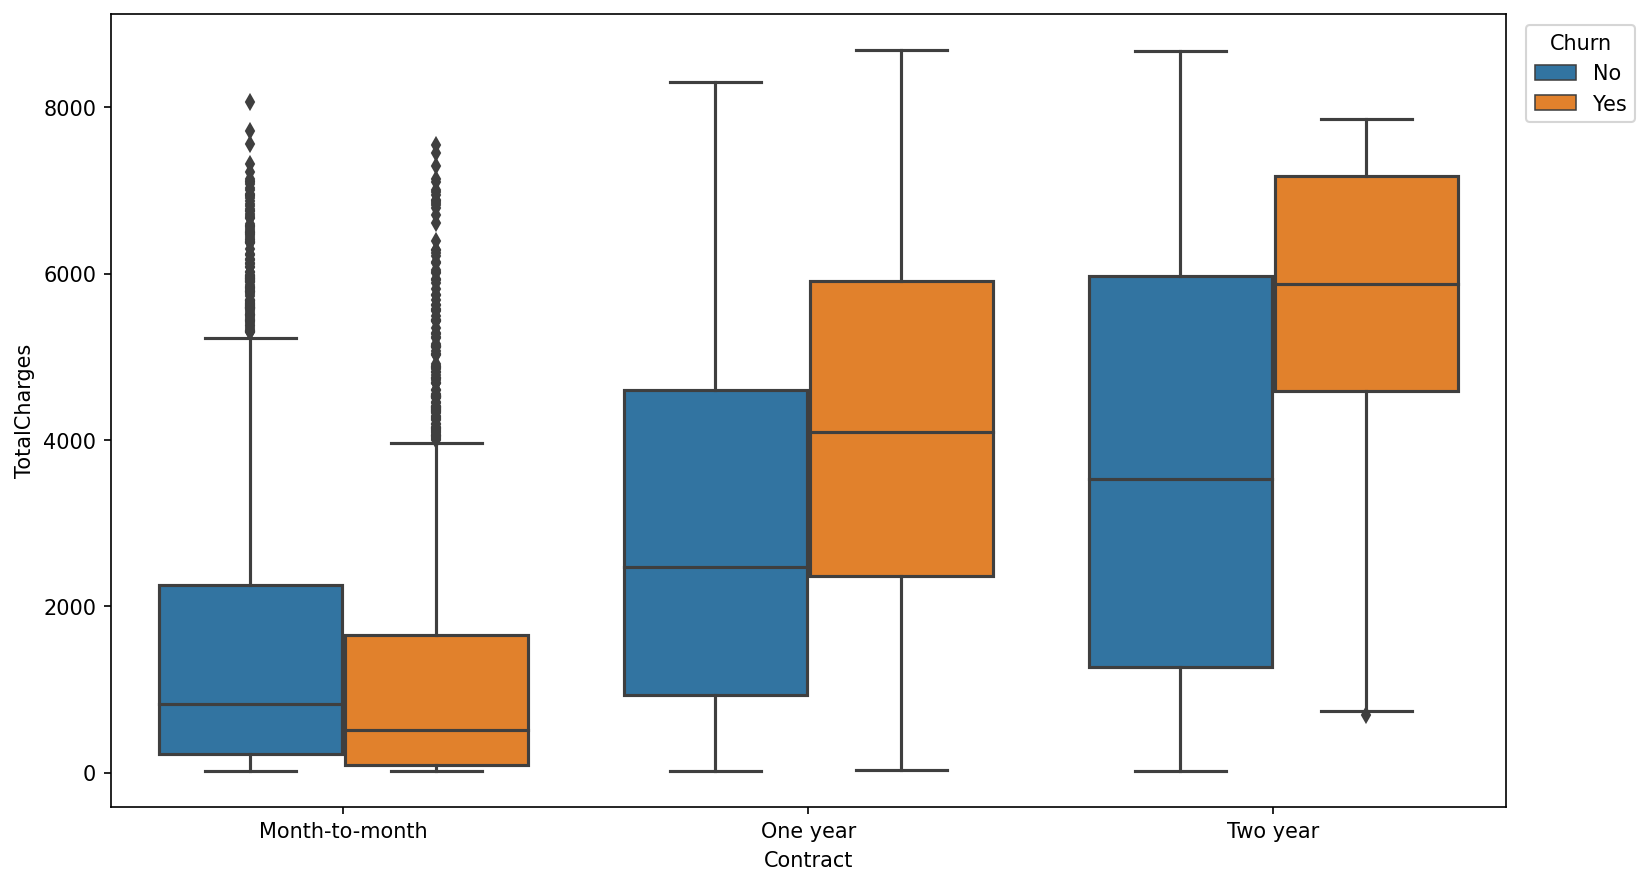

In [30]:
plt.figure(figsize=(12,7), dpi=150)
sns.boxplot(y="TotalCharges", x="Contract", hue="Churn", data=df);
plt.legend(bbox_to_anchor=(1.1, 0.9999), title="Churn")

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [101]:
corr_X = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', "Churn"]], drop_first=True)

<IPython.core.display.Javascript object>

In [102]:
data = corr_X.corr()["Churn_Yes"].sort_values()
data = data[:-1]
data

Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
InternetService_No                      -0.227578
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

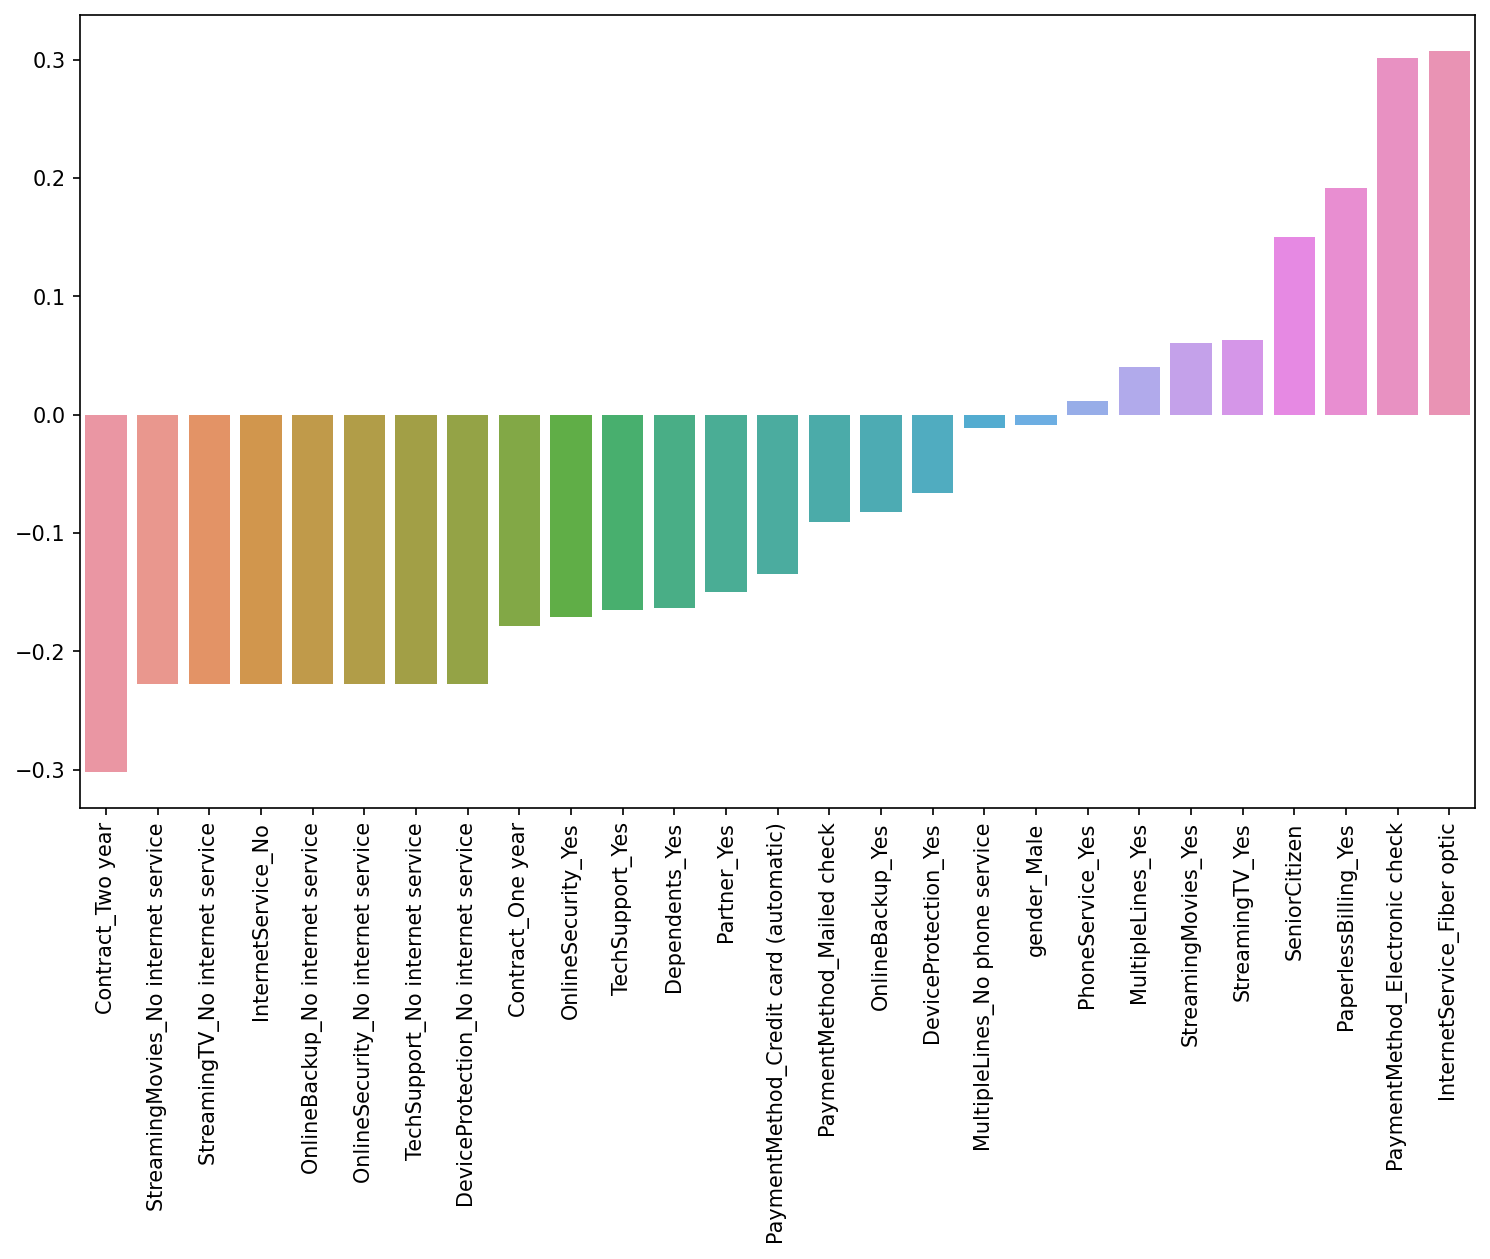

In [107]:
plt.figure(figsize=(12,7), dpi=150)
sns.barplot(x=data.index, y=data.values);
plt.xticks(rotation=90);

# Churn Analysis


**TASK: What are the 3 contract types available?**

In [108]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

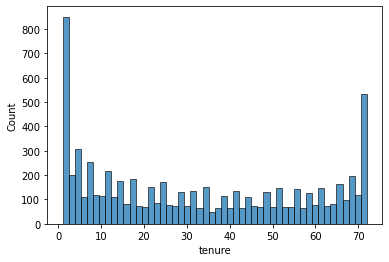

In [121]:
plt.plot(figsize=(12,7), dpi=140)
sns.histplot(df["tenure"], bins=50);

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

In [123]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [124]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

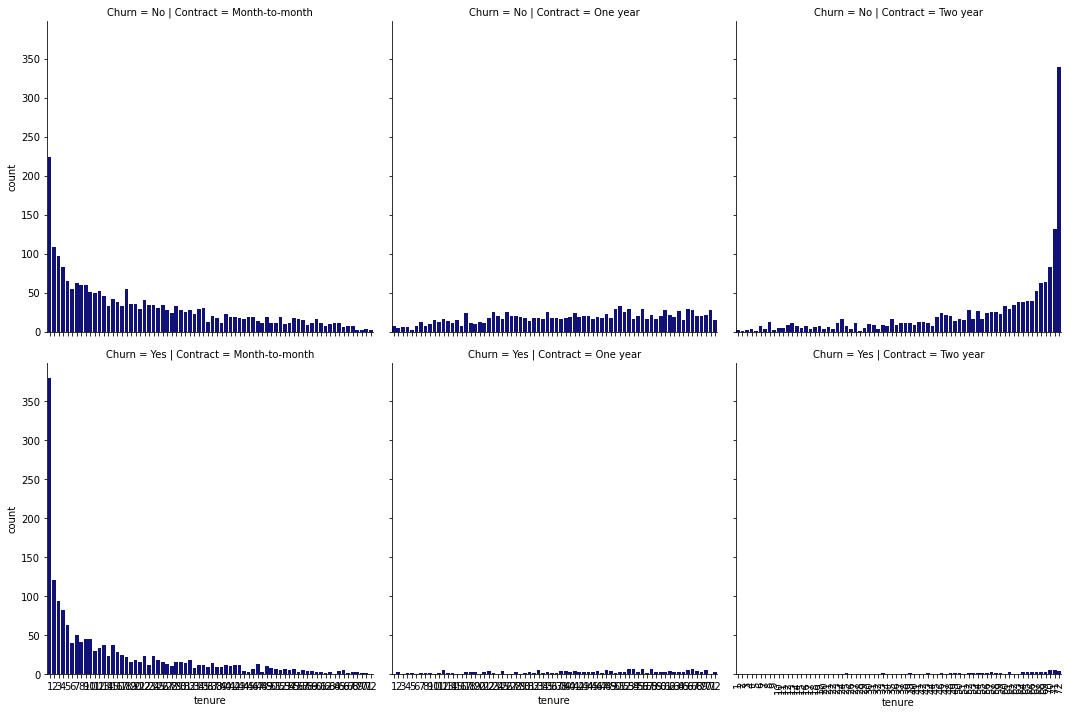

In [146]:
sns.catplot(data=df, x="tenure", kind="count", row="Churn", col="Contract", color="darkblue");
plt.xticks(rotation=90);

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

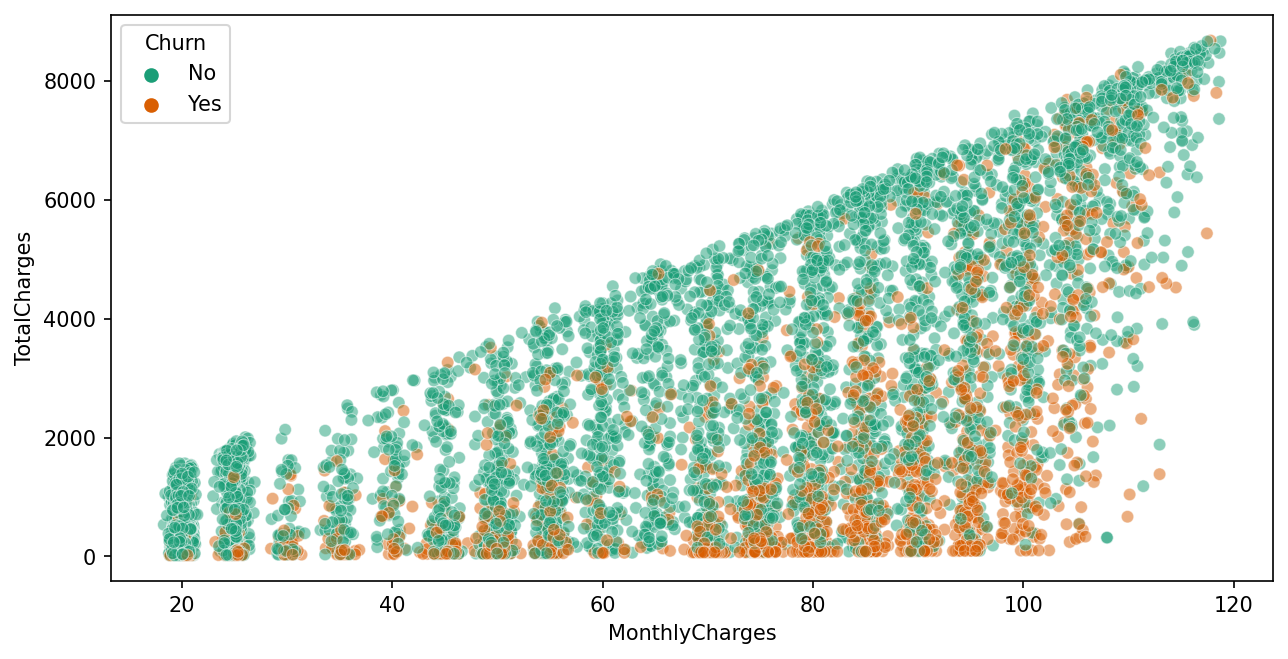

In [244]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=df, y="TotalCharges", x="MonthlyCharges", hue="Churn", alpha=0.5, palette="Dark2");

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [544]:
df2 = pd.concat([df.drop("Churn", axis=1), pd.get_dummies(df["Churn"], drop_first=True)], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [530]:
datas = df2.groupby("tenure").mean()["Yes"]

In [531]:
datas = datas*100

In [532]:
datas

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Yes, Length: 72, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

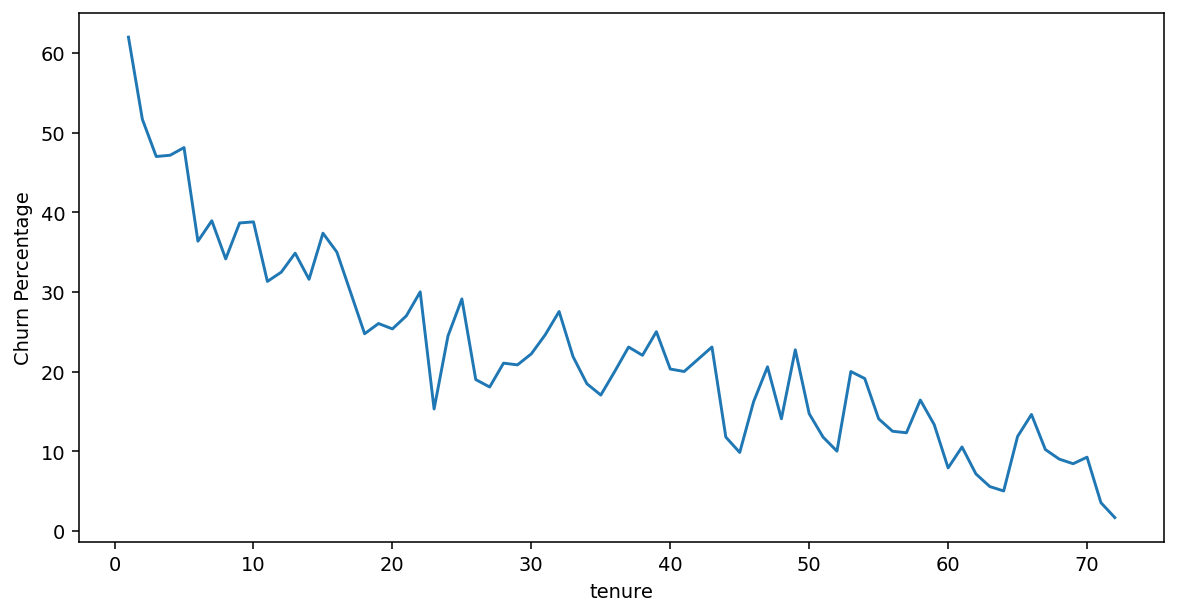

In [533]:
plt.figure(figsize=(10,5), dpi=140)
sns.lineplot(y=datas.values, x=datas.index).set(ylabel="Churn Percentage");

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [548]:
def create_cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months' 

In [550]:
df["Tenure Cohort"] = df["tenure"].apply(create_cohort)

In [552]:
datas

tenure
1        0-12 Months
2        0-12 Months
3        0-12 Months
4        0-12 Months
5        0-12 Months
           ...      
68    Over 48 Months
69    Over 48 Months
70    Over 48 Months
71    Over 48 Months
72    Over 48 Months
Name: Yes, Length: 72, dtype: object

In [553]:
for i in datas.index:
    if i <= 12:
        datas[i] = '0-12 Months'
    elif i <= 24:
        datas[i] = '12-24 Months'
    elif i <= 48:
        datas[i] = '24-48 Months'
    else:
        datas[i] = 'Over 48 Months' 
    

In [554]:
datas

tenure
1        0-12 Months
2        0-12 Months
3        0-12 Months
4        0-12 Months
5        0-12 Months
           ...      
68    Over 48 Months
69    Over 48 Months
70    Over 48 Months
71    Over 48 Months
72    Over 48 Months
Name: Yes, Length: 72, dtype: object

In [555]:
df2 = pd.DataFrame(data=datas)

<IPython.core.display.Javascript object>

In [556]:
df2 = df2.reset_index()

In [557]:
df2.columns = ["tenure", "Tenure Cohort"]

In [558]:
df2

,tenure,Tenure Cohort
0,1,0-12 Months
1,2,0-12 Months
2,3,0-12 Months
3,4,0-12 Months
4,5,0-12 Months
...,...,...
67,68,Over 48 Months
68,69,Over 48 Months
69,70,Over 48 Months
70,71,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

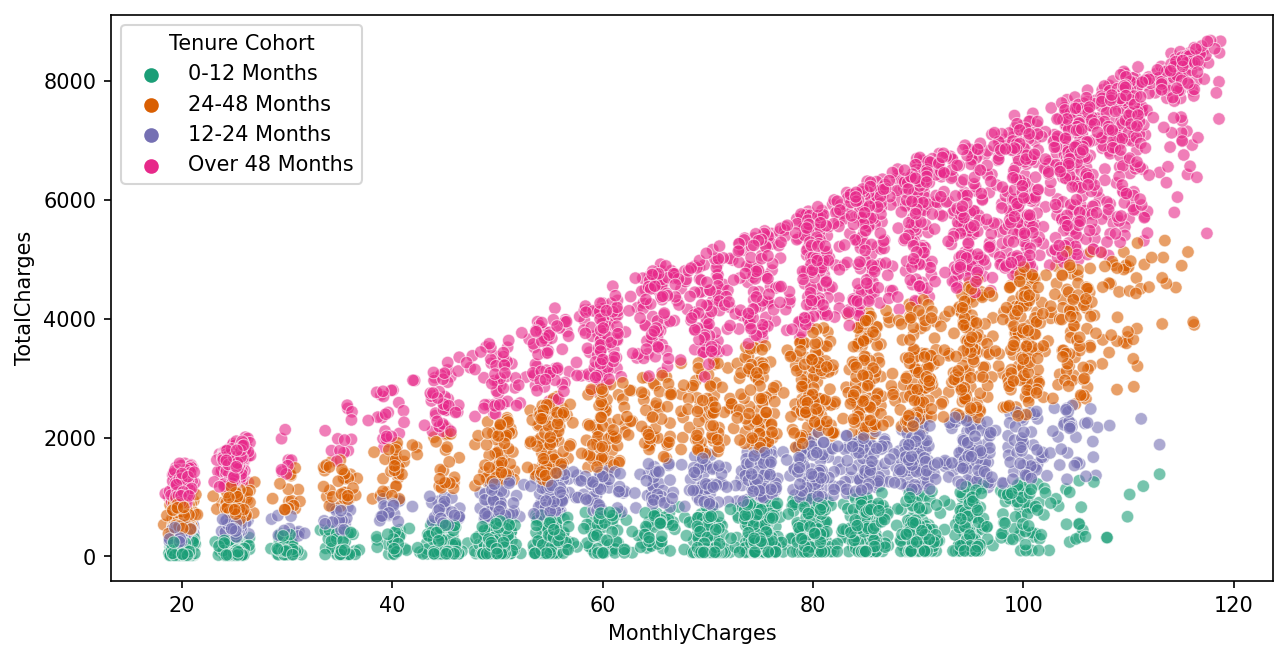

In [563]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Tenure Cohort", palette="Dark2",
               alpha=0.6);

**TASK: Create a count plot showing the churn count per cohort.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

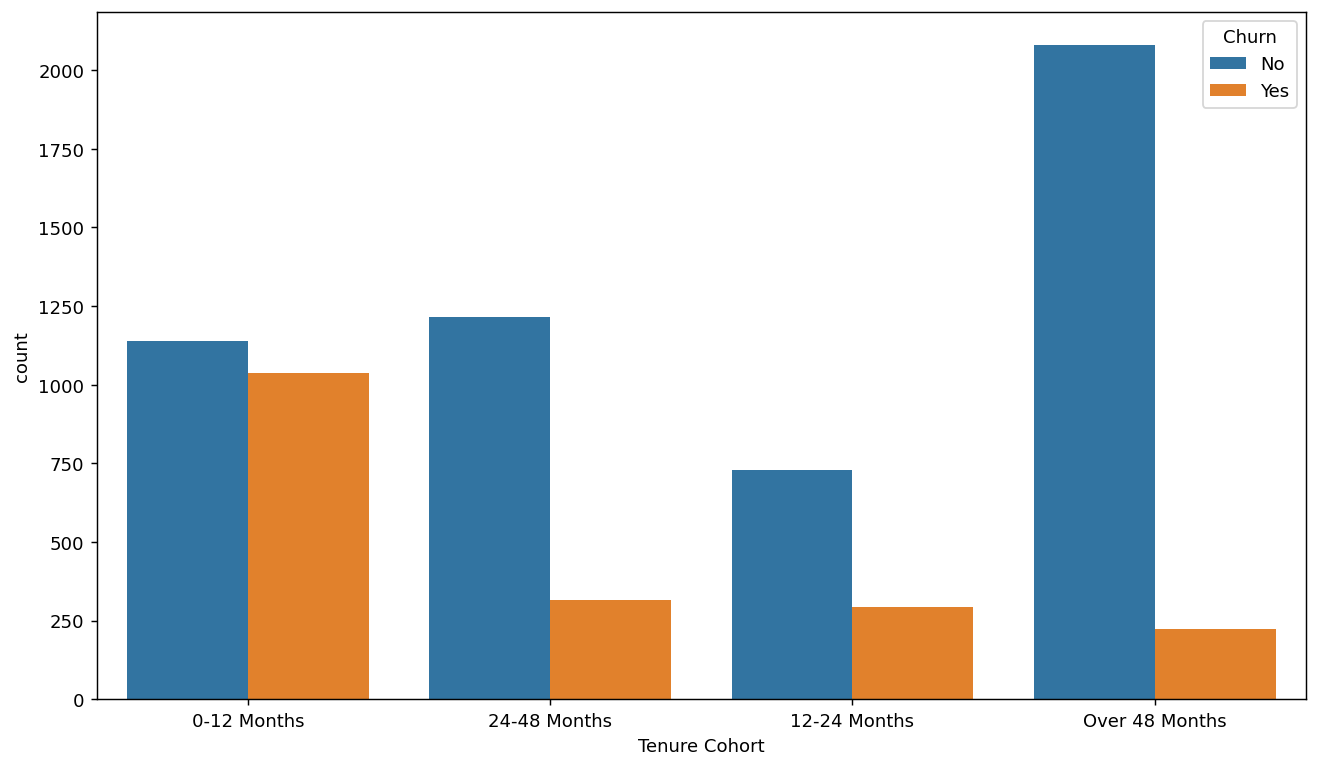

In [567]:
plt.figure(figsize=(12,7), dpi=130)
sns.countplot(hue="Churn", x="Tenure Cohort", data=df);

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<IPython.core.display.Javascript object>

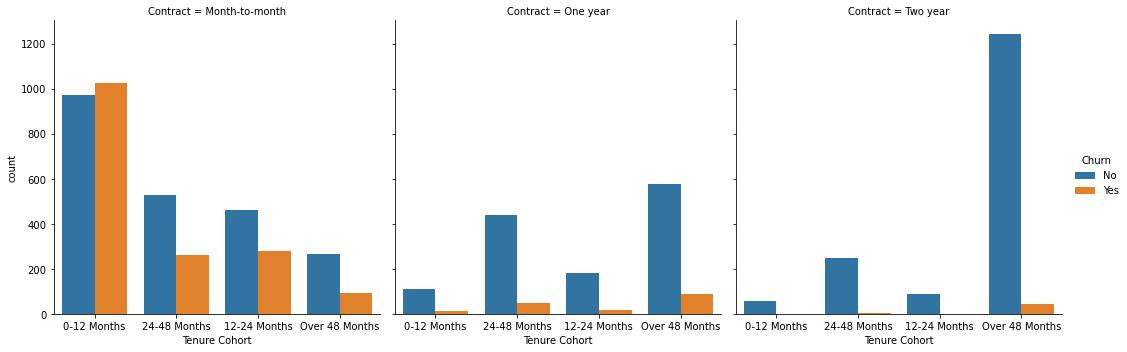

In [572]:
sns.catplot(data=df, x="Tenure Cohort", hue="Churn", kind="count", col="Contract");

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [584]:
X = pd.get_dummies(df.drop(["Churn", "customerID"], axis=1), drop_first=True)
y = df["Churn"]

<IPython.core.display.Javascript object>

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [588]:
from sklearn.model_selection import train_test_split
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [589]:
X_train, X_validate, y_train, y_validate = train_test_split(X_other, y_other, test_size=0.3, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [661]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [662]:
model = DecisionTreeClassifier(random_state=101)

In [663]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [664]:
model

DecisionTreeClassifier(random_state=101)

In [665]:
params = {"criterion":["gini", "entropy"], "max_depth":np.arange(1,11), "max_features":[3,4,5,6,7],
         'min_impurity_decrease':np.linspace(0,0.5,5)}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [666]:
grid = GridSearchCV(estimator=model, param_grid=params)

In [667]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [3, 4, 5, 6, 7],
                         'min_impurity_decrease': array([0.   , 0.125, 0.25 , 0.375, 0.5  ])})

In [718]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 6,
 'min_impurity_decrease': 0.0}

In [719]:
model = DecisionTreeClassifier(criterion= 'gini',max_depth = 4, max_features=6 ,min_impurity_decrease=0.0)

In [720]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [721]:
preds = model.predict(X_validate)

In [722]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [723]:
print(classification_report(y_validate, preds))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1427
         Yes       0.60      0.47      0.53       472

    accuracy                           0.79      1899
   macro avg       0.72      0.68      0.70      1899
weighted avg       0.78      0.79      0.78      1899



In [724]:
confusion_matrix(y_validate, preds)

array([[1279,  148],
       [ 249,  223]])

/home/mete/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


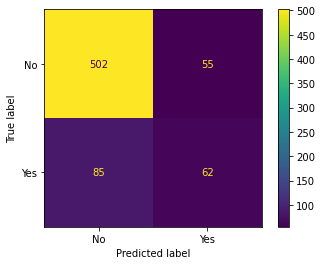

In [725]:
plot_confusion_matrix(model, X_test, y_test);

In [726]:
data = grid.best_estimator_.feature_importances_
data

array([0.00000000e+00, 4.54756926e-01, 3.38157160e-02, 9.10917500e-02,
       0.00000000e+00, 0.00000000e+00, 4.61727693e-03, 0.00000000e+00,
       0.00000000e+00, 4.68314426e-03, 1.24149661e-01, 0.00000000e+00,
       2.15261994e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.51453203e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.75375680e-03, 6.24092273e-05, 6.35134769e-03, 6.31069836e-03,
       0.00000000e+00])

In [727]:
data = pd.Series(data=data, index=X.columns)

<IPython.core.display.Javascript object>

In [728]:
data = data.sort_values()
data

SeniorCitizen                            0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaperlessBilling_Yes                     0.000000
Contract_Two year                        0.000000
Contract_One year                        0.000000
StreamingMovies_Yes                      0.000000
StreamingMovies_No internet service      0.000000
StreamingTV_Yes                          0.000000
StreamingTV_No internet service          0.000000
TechSupport_No internet service          0.000000
DeviceProtection_Yes                     0.000000
OnlineBackup_Yes                         0.000000
OnlineBackup_No internet service         0.000000
DeviceProtection_No internet service     0.000000
Partner_Yes                              0.000000
gender_Male                              0.000000
OnlineSecurity_Yes                       0.000000
PhoneService_Yes                         0.000000
MultipleLines_No phone service           0.000000
Tenure Cohort_Over 48 Months             0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

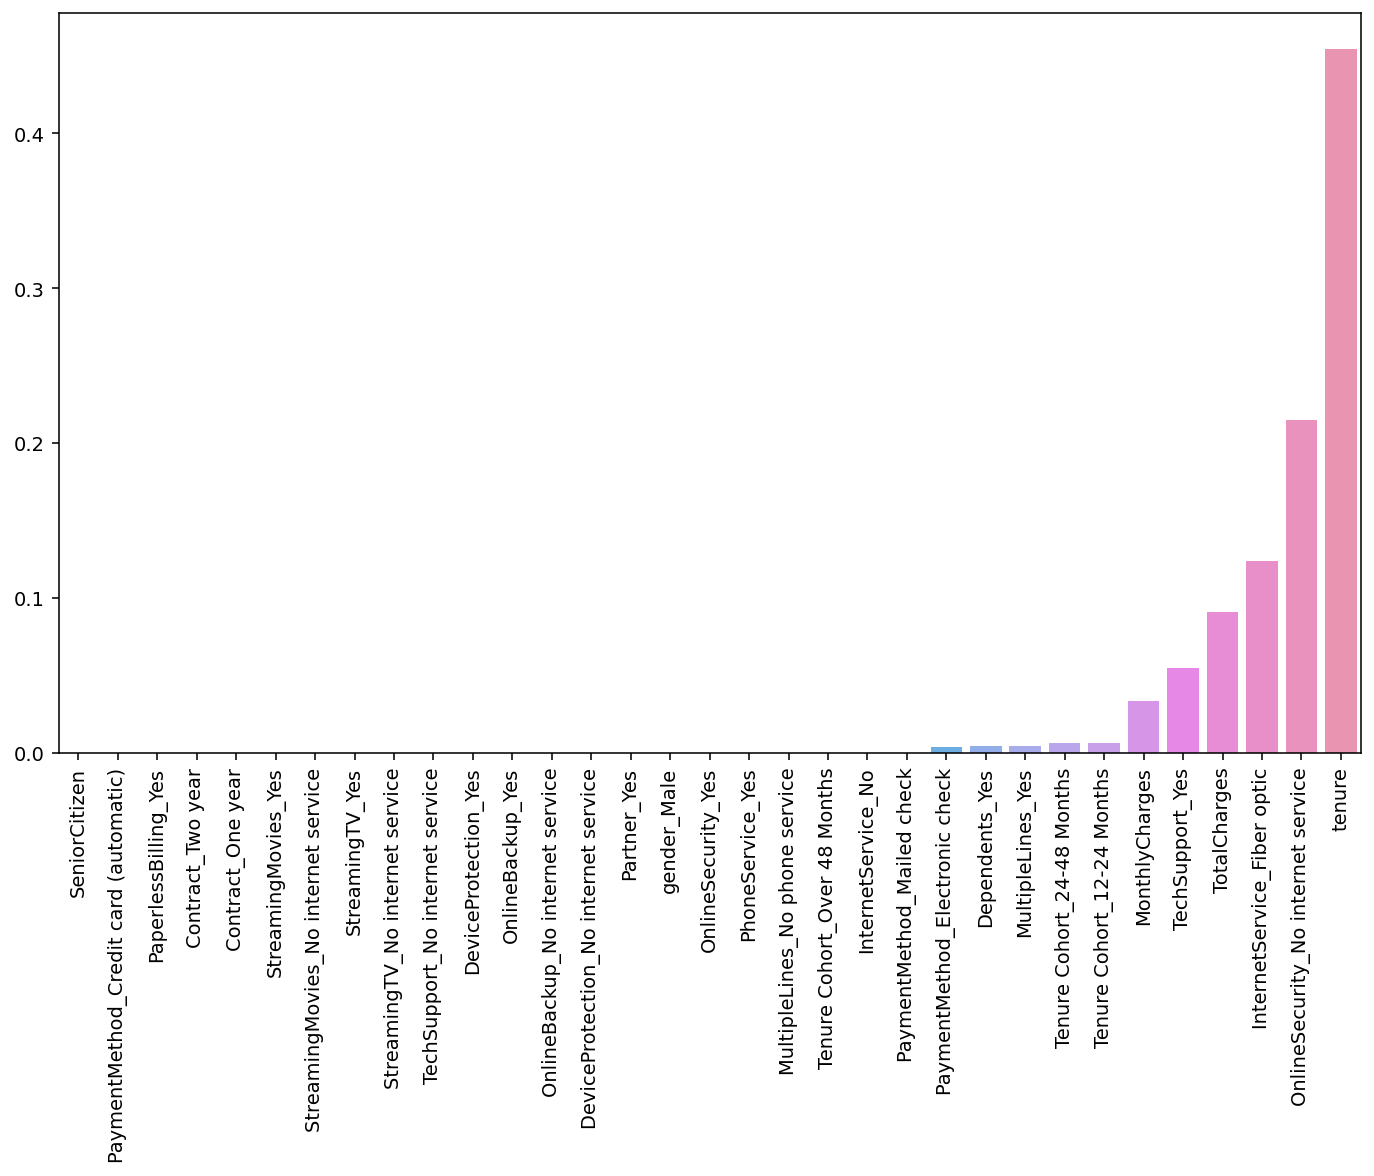

In [729]:
plt.figure(figsize=(12,7), dpi=140)
sns.barplot(x=data.index, y=data.values);
plt.xticks(rotation=90);

<IPython.core.display.Javascript object>

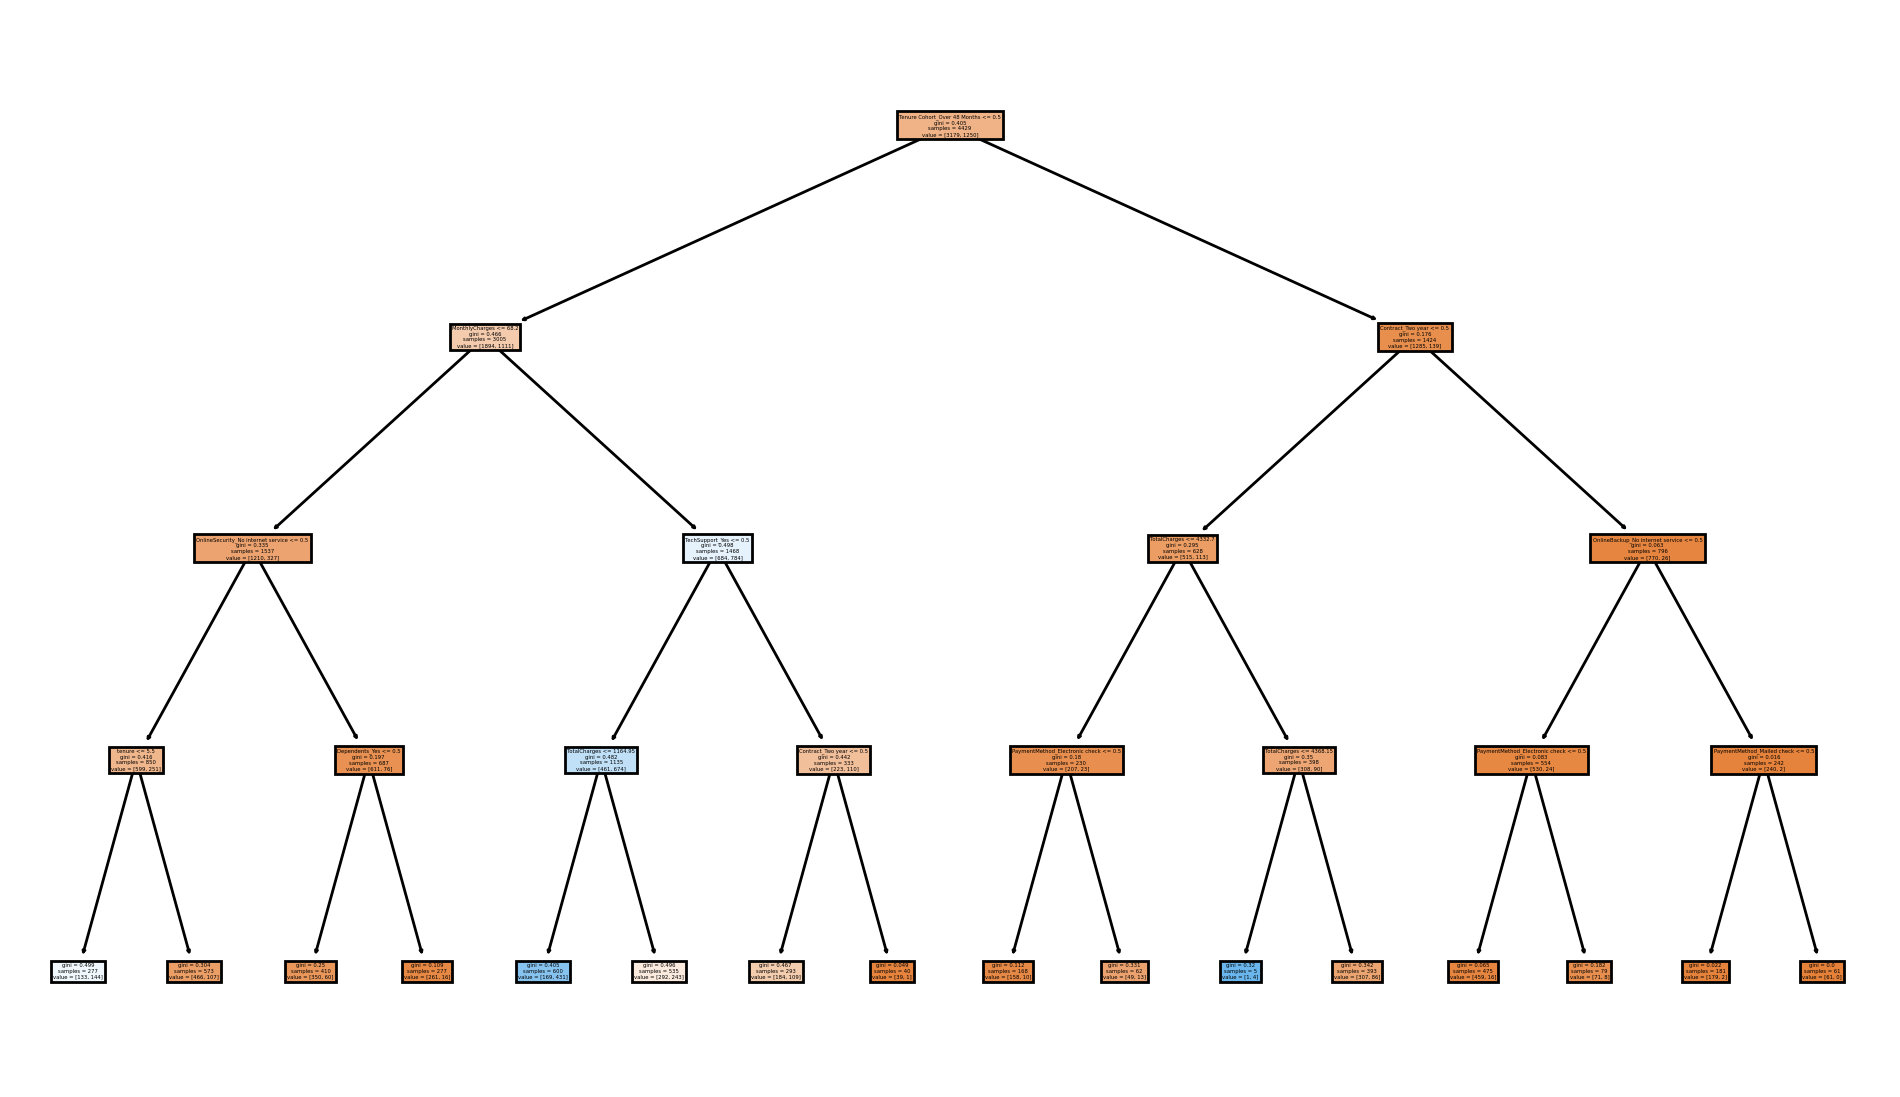

In [733]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,7), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [746]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(random_state=101)

In [747]:
params = {"bootstrap":[True, False], "class_weight":["balanced", None], 'criterion':["gini", "entropy"],
         "max_features":["auto", "sqrt", "log2"], 'min_impurity_decrease':np.linspace(0,0.5,10), 
         'n_estimators':[64,84,100,128]}
grid = GridSearchCV(estimator=model_forest, param_grid=params)

<IPython.core.display.Javascript object>

In [748]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_impurity_decrease': array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ]),
                         'n_estimators': [64, 84, 100, 128]})

In [749]:
grid.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_features': 'auto',
 'min_impurity_decrease': 0.0,
 'n_estimators': 128}

In [755]:
preds = grid.predict(X_test)

In [756]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [758]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.51      0.48      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.80      0.79       704



/home/mete/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


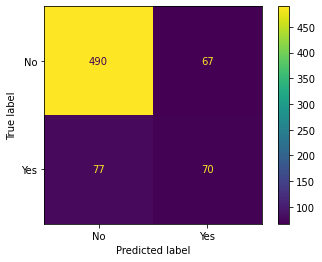

In [760]:
plot_confusion_matrix(grid, X_test, y_test);

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [761]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

In [764]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [766]:
preds = model.predict(X_test)

In [767]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.89      0.90      0.89       557
         Yes       0.59      0.56      0.58       147

    accuracy                           0.83       704
   macro avg       0.74      0.73      0.73       704
weighted avg       0.82      0.83      0.83       704



/home/mete/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


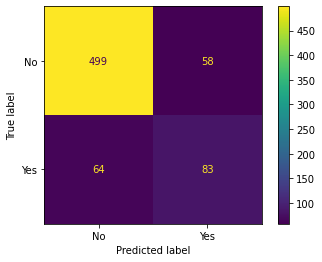

In [769]:
plot_confusion_matrix(model, X_test, y_test);